In [1]:
import numpy as np
import matplotlib.pyplot as plt

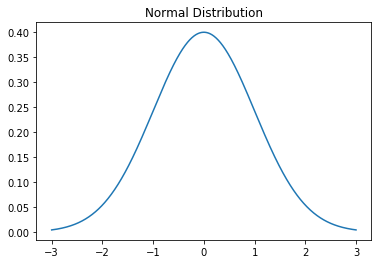

In [48]:
n = 1000

x = np.linspace(-3, 3, n)

class GaussFunc:
    def __init__(self, mu: float = 0, sigma: float = 1):
        self.mu = mu
        self.sigma = sigma
        
    def gauss_func(self, x: np.ndarray) -> np.ndarray:
        return (1 / np.sqrt(2*np.pi*self.sigma)) * np.exp(-(x - self.mu)**2 / (2*self.sigma))
    
standard = GaussFunc(0, 1)
y = standard.gauss_func(x)

plt.figure(facecolor='white')
plt.plot(x, y)
plt.title('Normal Distribution')
plt.show()

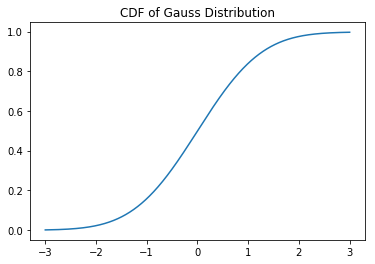

In [49]:
from typing import Callable


def integrate(start: np.ndarray, end: np.ndarray, f: Callable) -> np.ndarray:
    x = np.linspace(start, end, n)
    dx = (end - start) / n
    return np.sum(f(x), axis=0) * dx

# Cumulative Distribution Function
def CDF(f: Callable) -> Callable:
    return lambda x: integrate(-3, x, f)

std_normal_cdf = CDF(standard.gauss_func)

plt.figure(facecolor='white')
plt.plot(x, std_normal_cdf(x))
plt.title('CDF of Gauss Distribution')
plt.show()

In [50]:
def error_function(x: np.ndarray) -> np.ndarray:
    return (2 / np.sqrt(np.pi)) * integrate(0, x, lambda t: np.exp(-t**2))

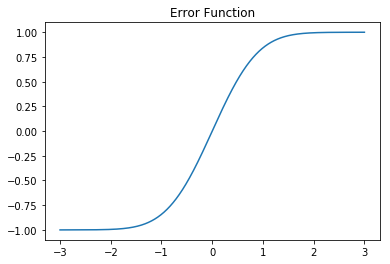

In [51]:
plt.figure(facecolor='white')
plt.plot(x, error_function(x))
plt.title('Error Function')
plt.show()

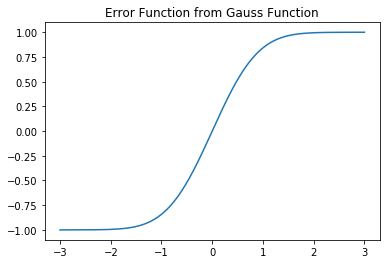

In [56]:
class ErrorFunc(GaussFunc):
    def __init__(self):
        super().__init__(mu=0, sigma=1)
        
    def erf(self, x: np.ndarray) -> np.ndarray:
        t = np.sqrt(2) * self.sigma * x
        return 2 * integrate(0,  t, self.gauss_func)

y = ErrorFunc().erf(x)    
plt.figure(facecolor='white')
plt.plot(x, y)
plt.title('Error Function from Gauss Function')
plt.show()